# ML-Fundamentals - Bias Variance Tradeoff

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-Modules)
* [Exercise](#Exercise)
 * [Data Generation](#Data-Generation)
 * [Hypothesis](#Hypothesis)
 * [Plot](#Plot)
 * [Out of Sample Error](#Out-of-Sample-Error)
 * [Repeat](#Repeat)
 * [Average and Plot](#Average-and-Plot)
 * [Bias](#Bias)
 * [Variance](#Variance)
* [Summary and Outlook](#Summary-and-Outlook)
* [Literature](#Literature) 
* [Licenses](#Licenses)

## Introduction

If you completed the exercises *simple-linear-regression*, *multivariate-linear-regression* and *logistic-linear-regression* you know how to fit these models according to your training data.

This alone so far has no practical use case. The benefit of learning a model is to predict unseen data. Additionally, only with unseen data your model has not learnt from, it is possible to say if your model generalizes well or not. One way to measure this, is calculating the *out of sample error* $E_{out}$, which consists of the measures *bias* and *variance*.

In this notebook you will calculate two simple hypothesis for linear regression based on training data and compare them with the use of unseen validation data by calculating $E_{out}$, *bias* and *variance*.

## Requirements

### Knowledge

You should have a basic knowledge of:
- Univariate linear regression
- Out of sample error (bias variance)

Suitable sources for acquiring this knowledge are:
- [Simple Linear Regression Notebook](http://christianherta.de/lehre/dataScience/machineLearning/basics/univariate-linear-regression.php) by Christian Herta and his [lecture slides](http://christianherta.de/lehre/dataScience/machineLearning/linearRegression.pdf) (German)

- [Bias Variance Tradeoff](http://christianherta.de/lehre/dataScience/machineLearning/basics/bias-variance-tradeoff.php) by Christian Herta and his [lecture slides](http://christianherta.de/lehre/dataScience/machineLearning/bias-variance-tradeoff.pdf) (German)

- [numpy quickstart](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)

### Python Modules

By [deep.TEACHING](https://www.deep-teaching.org/) convention, all python modules needed to run the notebook are loaded centrally at the beginning. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise

Exercise inspired by lecture 8 from:
- Yaser Abu-Mostafa
 - [Learning from Data, Caltech Machine Learning](http://home.caltech.edu/telecourse.html) [ABU18a]
 - Or directly at [here](https://www.youtube.com/watch?v=zrEyxfl2-a8&hd=1) [ABU18b]

Implement the following simulation for calculating the bias and variance:

**Given:**
- $p(x)$ is unformly distributed in the interval of $[0, 2\pi]$
- The unknown target function is the sinus function, so the targets are $y = sin(x)$
- There is no noise on $y$
- Hypthesis $H_1(x) = \theta_0 + \theta_1 x$
- Hypthesis $H_2(x) = w$ (a constant) 

**Task:**
- Do the following 10.000 times:
 - Draw two random examples $x^1$ and $x^2$ from $p(x)$ and calculate the corrsponding $y$s to get $(x^1,y^1), (x^2,y^2)$ *(training data)* 
 - Using your *training data* calculate the parameters $\theta_0, \theta_1$ for $H_1$ and the parameter $w$ for $H_2(x)$
 - Numerically calculate the out of sample error $E_{out}$ for $H_1(x)$ and $H_2(x)$ for 100 data points uniformly distributed in the interval of $[0, 2\pi]$ (*validation data*) 
 
 
- Now calculate the average $\theta_0, \theta_1$ and $w$ of all 10.000 experiments
- Also calculate the mean of the out of sample error $E_{out}$ for $H_1(x)$ and $H_2(x)$
- Use the above to calculate the *bias* and the *variance*
- Plot the target function $sin(x)$ together with both hypothesis $H_1(x)$ and $H_2(x)$ using the average $\theta_0, \theta_1$ and $w$
- Considering your results, which hypothsis seems to better model the target function?

Practically this explanation is all you need to solve the exercise. You are free to complete it without any further guiding or by proceeding with this notebook.

### Data Generation

**Task:**

Implement the function to draw two random training examples $(x^i,y^i)$ with:

- $x^i \in Uniform(0,2\pi)$
- $i \in {1,2}$
- $y^i = sin(x^i)$

In [2]:
def train_data():
    n = 2
    x = np.random.uniform(0, 2*np.pi,  n)
    y = np.sin(x)
    return (x,y)


In [3]:
x_train, y_train  = train_data()
print(x_train, y_train)

[1.64638916 2.92382657] [0.99714422 0.21604901]


In [4]:
# If your implementation is correct, these tests should not throw an exception

assert len(x_train) == 2
assert len(y_train) == 2
np.testing.assert_array_equal(np.sin(x_train), y_train)
for i in range(1000):
    x_tmp, _ = train_data()
    assert x_tmp.min() >= 0.0
    assert x_tmp.max() <= 2*np.pi

### Hypothesis

For our training data we will now model two different hypothesis:

$$H_1(x) = \theta_0 + \theta_1 x$$

and 

$$H_2(x) = w$$

**Task:**

Implement the functions to calculate the parameters $\theta_0, \theta_1$ for $H_1$ and $w$ for $H_2$ using the two drawn examples. 

For later purpose (passing functions as argument) it is important that both functions accept the same amount of parameters and also return the same amount. Therefore we also pass $x$ to `get_w`, although we do not need it. And for the same reason `get_thetas` should return a list of two values instead of two seperate values.

In [5]:
def get_thetas(x, y):
    theta1= (y[1] - y[0])/(x[1] - x[0])
    theta0= y[1] - theta1 * x[1]
    return (theta0, theta1)

def get_w(x, y):
    theta = np.mean(y)
    return theta

In [6]:
thetas = get_thetas(x_train, y_train)
w = get_w(x_train, y_train)
print(thetas[0], thetas[1])
print(w)

2.003836750891403 -0.6114547835026383
0.6065966164455938


In [7]:
# If your implementation is correct, these tests should not throw an exception

x_train_temp = np.array([0,1])
y_train_temp = np.array([np.sin(x_i) for x_i in x_train_temp])
thetas_test = get_thetas(x_train_temp, y_train_temp)
w_test = get_w(x_train_temp, y_train_temp)

np.testing.assert_almost_equal(thetas_test[0], 0.0)
np.testing.assert_almost_equal(thetas_test[1], 0.8414709848078965)
np.testing.assert_almost_equal(w_test, 0.42073549240394825)

**Task:**

Implement the hypothesis $H_1$ and $H_2$. Your function should return a function.

In [8]:
def get_hypothesis_1(thetas):
    return lambda x: thetas[0] + thetas[1] * x
    
def get_hypothesis_2(w):
    return lambda x: np.ones_like(x) * w

In [9]:
# validation data (which our model has not learnt from, but we know the labels)

x_validation = np.linspace(0, 2*np.pi, 100)
y_validation = np.sin(x_validation)

In [10]:
# If your implementation is correct, these tests should not throw an exception

h1_test = get_hypothesis_1(thetas_test)
h2_test = get_hypothesis_2(w_test)
np.testing.assert_almost_equal(h1_test(x_validation)[10], 0.5340523361780719)
np.testing.assert_almost_equal(h2_test(x_validation)[10], 0.42073549240394825)

### Plot

Following the original exercise it is not yet necessary to plot anything. But it also does not hurt to do so, since we need to implement code for the plot anyways.

**Task:**

Write the function to plot:
- the two examples $(x^1,y^1)$ and $(x^2,y^2)$
- the true target function $sin(x)$ in the interval $[0, 2 \pi]$.
- the hypothesis $H_1$ in the interval $[0, 2 \pi]$
- the hypothesis $H_2$ in the interval $[0, 2 \pi]$
    
Your plot should look similar to this one:

<img src="https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/klaus/exercise-bias-variance-sin-h1-h2-one-example.png" width="512" alt="internet connection needed">

In [11]:
def plot_true_target_function_x_y_h1_h2(x, y, hypothesis1, hypothesis2):
    X_logplot = np.linspace(0, 7, 1000)
    target= np.sin(X_logplot)
    y_h1 = hypothesis1(X_logplot)
    y_h2 = hypothesis2(X_logplot)
    plt.plot(X_logplot, target)
    plt.plot(X_logplot, y_h1)
    plt.plot(X_logplot, y_h2)
    if(len(x)>0 and len(y)>0):
        plt.plot(x[0], y[0], "ob")
        plt.plot(x[1] , y[1], "ob")
    plt.show()


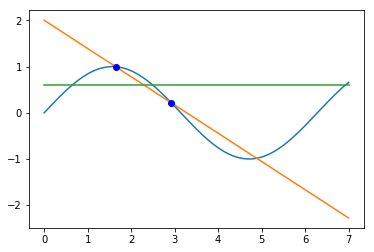

In [12]:
thetas = get_thetas(x_train, y_train)
w = get_w(x_train, y_train)
plot_true_target_function_x_y_h1_h2(x_train, y_train, get_hypothesis_1(thetas), get_hypothesis_2(w))

### Out of Sample Error

The out of sample error $E_{out}(H)$ is the the expected value of the test error, which can be estimated with unseen validation data $x', y'$ with:

$$
E_{out}(H) = \mathbb E_{x,y}[loss(H(x),y)] \approx \frac{1}{m} \sum^m loss(H(x'), y') 
$$

**Task:**

Implement the function to numerically calculate the out of sample error $E_{out}$ with the mean squared error as loss function.

In [13]:
def out_of_sample_error(y_preds, y):
    return np.mean((y_preds - y)**2)

In [14]:
# If your implementation is correct, these tests should not throw an exception

e_out_h1_test = out_of_sample_error(h1_test(x_validation), y_validation)
np.testing.assert_almost_equal(e_out_h1_test, 11.525485917588728)

### Repeat

**Task:**

Now instead of drawing two examples once, draw two examples 10.000 times and calculate $E_{out}$ for $H_1$ and $H_2$ given the validation data.

For each run, keep track of the following parameters and return them at the end of the function:
- $(x^1,x^2)$
- $(y^1,y^2)$
- $\theta_0$
- $\theta_1$
- $w$.
- $E_{out}$


In [15]:
def run_experiment(m, x_val, y_val):
    xs = np.zeros([m, 2])
    ys = np.zeros([m, 2])
    t0s = np.zeros([m])
    t1s = np.zeros([m])
    ws = np.zeros([m])
    e_out_h1s = np.zeros([m])
    e_out_h2s = np.zeros([m])
    
    for i in range(m):
        rand = np.random.randint(0, len(x_val))
        
        #pick random x and y
        x1 = x_val[rand]
        y1 = y_val[rand]
        
        #pick random x and y again
        rand = np.random.randint(0, len(x_val))
        x2 = x_val[rand]
        y2 = y_val[rand]
        
        #save the picked data
        xs[i] = np.array([x1, x2])
        ys[i] = np.array([y1, y2])
        
        #calculate thetas -> model 1 based on the given training data (consisting of two points)
        thetas = get_thetas(xs[i], ys[i])
        t0s[i] = thetas[0]
        t1s[i] = thetas[1]
        
        #calculate w -> model 2 based on the given training data (consisting of two points)
        w = get_w(xs[i], ys[i])
        ws[i] = w
        
        #generate hypothesis 1, its out of sample error and save it
        h1 = get_hypothesis_1(thetas)
        e_out_h1 = out_of_sample_error(h1(x_val), y_val)
        e_out_h1s[i] = e_out_h1
        """if (np.isnan(e_out_h1s[i])):
            print(thetas)
            print("\n")"""
        
        #generate hypothesis 2, its out of sample error and save it
        h2 = get_hypothesis_2(w)
        e_out_h2 = out_of_sample_error(h2(x_val), y_val)
        e_out_h2s[i] = e_out_h2
    
    return xs, ys, t0s, t1s, ws, e_out_h1s, e_out_h2s

In [19]:
m=10000
x_validation = np.linspace(0, 2*np.pi, m)
y_validation = np.sin(x_validation)
xs, ys, t0s, t1s, ws, e_out_h1s, e_out_h2s = run_experiment(
    m, x_validation, y_validation)

### Average and Plot


Now we can calculate the average of $\theta_0, \theta_1$, $w$ and $E_{out}$ and already plot the resulting averaged $\tilde H_1$ and $\tilde H_2$ together with the target function $sin(x)$.

Your plot should look similar to the one below:

<img src="https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/klaus/exercise-bias-variance-sin-h1-h2-avg.png" width="512" alt="internet connection needed">

In [20]:
t0_avg = t0s.mean()
t1_avg = t1s.mean()
thetas_avg = [t0_avg, t1_avg]
w_avg = ws.mean()
h1_avg = get_hypothesis_1(thetas_avg)
h2_avg = get_hypothesis_2(w_avg)

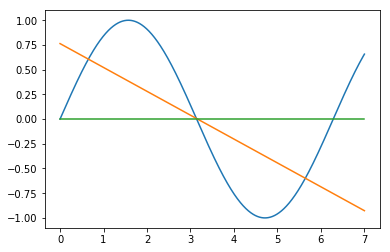

In [21]:
plot_true_target_function_x_y_h1_h2([], [], h1_avg, h2_avg)

In [22]:
expectation_Eout_1 = e_out_h1s.mean()
print ("expectation of E_out of model 1:", expectation_Eout_1)

expectation of E_out of model 1: 1.912262627991864


In [23]:
expectation_Eout_2 = e_out_h2s.mean()
print ("expectation of E_out of model 2:", expectation_Eout_2)

expectation of E_out of model 2: 0.755005925065807


### Bias

The bias is defined as:

$$
bias = \mathbb E_x \left[(\tilde H(x') - y')^2\right]
$$

with:

- the average hypothesis $\tilde H$ and it's output on the unseen data $\tilde H(x')$
- $y'$ the ground truth (true) labels for $x'$

**Task:**

Implement the function to calculate the mean bias .

In [24]:
def bias(y_true, y_predicted):
    return np.square(y_predicted - y_true).mean()
    #return np.mean((y_predicted - y_true) ** 2)

In [25]:
bias_1 = bias(y_validation,  h1_avg(x_validation))
print ("Bias of model 1:", bias_1)

Bias of model 1: 0.20892377700647116


In [26]:
bias_2 = bias(y_validation,  h2_avg(x_validation))
print ("Bias of model 2:", bias_2)

Bias of model 2: 0.4999512263199692


### Variance

Variance:

$$
variance = \mathbb E_x \left[ \mathbb E_D \left[(H^D(x') - \tilde H(x'))^2 \right] \right]
$$

with:

- the average hypothesis $\tilde H$ and it's output on the unseen data $\tilde H(x')$
- the learnt hypothesis $H^D$ for training data $D$. $D$ here equals to $x$ and $y$ without the $'$

**Task:**

Implement the function to calculate the variances for each of the 10.000 experiements and return them as list or array.

Now we benefit from our implementation of `get_w`, `get_thetas`, respectively `get_hypothesis1`,`get_hypothesis2`, which accept and return the same amount of parameters, so we can write a generalized function.


In [27]:
def variances(hypothesis_func, param_func, xs, ys, x_val, y_preds):
    
    Eds = []
    
    for x,y in zip(xs,ys):
        current_params = param_func(x, y)
        current_hypothesis = hypothesis_func(current_params)
        current_hypothesis_guesses = np.array(current_hypothesis(x_val))
        
        average_hypothesis_guesses = np.array(y_preds)
        
        current_Ed =  np.mean((current_hypothesis_guesses - average_hypothesis_guesses)**2)
        Eds.append(current_Ed)
        
    return np.array(Eds)

In [28]:
vars_1 = variances(get_hypothesis_1, 
                 get_thetas, 
                 xs, ys, 
                 x_validation, 
                 h1_avg(x_validation))
var_1_avg = vars_1.mean()
print(var_1_avg)

1.7033388509853928


In [29]:
vars_2 = variances(get_hypothesis_2, 
                 get_w, 
                 xs, ys, 
                 x_validation, 
                 h2_avg(x_validation)).mean()
var_2_avg = vars_2.mean()
print(var_2_avg)

0.25505469874583786


In [30]:
print("model 1: E_out ≈ bias + variance:  %f ≈ %f + %f" % (expectation_Eout_1, bias_1, var_1_avg))
print("model 2: E_out ≈ bias + variance:  %f ≈ %f + %f" % (expectation_Eout_2, bias_2, var_2_avg))

model 1: E_out ≈ bias + variance:  1.912263 ≈ 0.208924 + 1.703339
model 2: E_out ≈ bias + variance:  0.755006 ≈ 0.499951 + 0.255055


## Summary and Outlook

[TODO]

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise: Bias Variance Tradeoff <br/>
by Christian Herta, Klaus Strohmenger<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christian Herta, Klaus Strohmenger

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.